In this code we analise every audio in augmented_soundscapes, applying to each of them their own gain (obtained according to their Leq, check src/scripts/dataset/dataset_Adequate_ARAUS_for_extension.ipynb) for gain calculation). Then, we try different normalisation gains to find the one that has a good compromise between signal amplitude and clipping.

In [16]:
import os
import sys
import pandas as pd
from scipy.io import wavfile
import essentia.standard as es
import numpy as np

# Set the working directory
os.chdir('/Users/amaiasagastimartinez/Desktop/SENS-Soundlights/code/UrbanPleasantnessEventfulness/')

# Verify the current working directory
print("Current Working Directory:", os.getcwd())

from src.lib.dataset.auxiliary_functions import load

Current Working Directory: /Users/amaiasagastimartinez/Desktop/SENS-Soundlights/code/UrbanPleasantnessEventfulness


# Check Leq distribution

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],  # Set to Times New Roman
    'font.size': 16,  # Set a suitable font size
    'axes.labelsize': 15,
    'axes.titlesize': 20,
    'legend.fontsize': 10,
    'xtick.labelsize': 13,
    'ytick.labelsize': 13
})

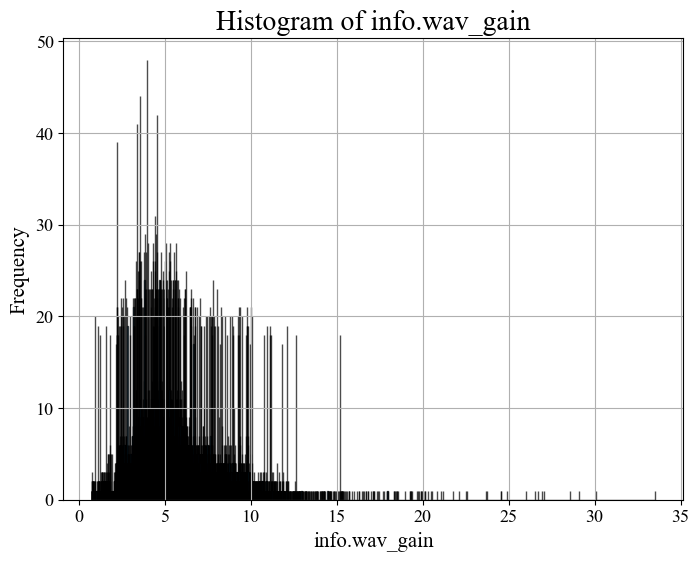

<Figure size 640x480 with 0 Axes>

In [8]:
# Paths to your CSV files
csv_file_path_1 = "data/ARAUS_extended.csv"

# Read CSV files into DataFrames
df = pd.read_csv(csv_file_path_1)

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(df['info.wav_gain'], bins=25000, edgecolor='k', alpha=0.7)
plt.title('Histogram of info.wav_gain')
plt.xlabel('info.wav_gain')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# Check clipping with different wav_gain options

Normalization gains = [6.44, 6, 6.5, 5, 4.5]

In [15]:
norm_gains=[6.44, 6, 6.5, 5, 4.5]
# Go over each audio file
audioFolderPath="data/soundscapes_augmented/"
csvPath="data/ARAUS_extended.csv"
ARAUScsv = pd.read_csv(csvPath)
#files = sorted(os.listdir(audioFolderPath))

for norm_gain in norm_gains:
    count_clip=0
    count_total=0
    clipping=[]
    for dirpath, dirnames, files in os.walk(audioFolderPath):
        # Iterate over all files in the current directory
        files.sort()
        for file in files:
            if file.endswith(".mp3") or file.endswith(".wav"):
                #print("File ", file)

                # Find the row in ARAUS dataset that the audio filename matches to get wav gain
                audio_path = dirpath + "/"+file
                file_split = file.split("_")
                file_fold = int(file_split[1])
                file_participant = "ARAUS_" + file_split[3]
                file_stimulus = int(file_split[5].split(".")[0])
                audio_info_aug = ARAUScsv[ARAUScsv["info.fold"] == file_fold]
                audio_info_aug = audio_info_aug[
                    audio_info_aug["info.stimulus_index"] == file_stimulus
                ]
                audio_info_aug = audio_info_aug[
                    audio_info_aug["info.participant"] == file_participant
                ]
                gain = audio_info_aug["info.wav_gain"].values[0]

                # Load the stereo audio file
                audio,fs=load(audio_path, wav_calib=1.0, ch=1)
                audio_gain=audio*gain/norm_gain


                # Calculate samples that are over absolute value =1 (clipping)
                count_samples_clip=np.sum(np.abs(audio_gain)>1)
                percentage_clip=count_samples_clip/audio_gain.shape[0]*100


                #Clipping?
                if(count_samples_clip>1):
                    clipping.append([file, gain, count_samples_clip, percentage_clip])
                    count_clip+=1

                count_total=count_total+1

    print("With Normalization gain = ", norm_gain)
    for i in clipping:
        print(i)
    print("There were ",count_clip ," clippings out of ",count_total," meaning a ", (count_clip/count_total)*100 ,"% ")
    print("---------------------------------------------")

With Normalization gain =  6.44
There were  0  clippings out of  25440  meaning a  0.0 % 
---------------------------------------------
With Normalization gain =  6
['fold_3_participant_00038_stimulus_17.wav', 8.472688249504682, 8, 0.0005555555555555556]
There were  1  clippings out of  25440  meaning a  0.003930817610062893 % 
---------------------------------------------
With Normalization gain =  6.5
There were  0  clippings out of  25440  meaning a  0.0 % 
---------------------------------------------
With Normalization gain =  5
['fold_3_participant_00038_stimulus_17.wav', 8.472688249504682, 19, 0.0013194444444444445]
There were  1  clippings out of  25440  meaning a  0.003930817610062893 % 
---------------------------------------------
With Normalization gain =  4.5
['fold_1_participant_00341_stimulus_24.wav', 6.509215625947191, 6, 0.0004166666666666667]
['fold_2_participant_00167_stimulus_03.wav', 7.667591587503071, 41, 0.0028472222222222223]
['fold_2_participant_00257_stimulus_

Same code with Normalization gains = [4,3.5,3,2.5,2,1.5]

In [17]:
norm_gains=[4,3.5,3,2.5,2,1.5]
# Go over each audio file
audioFolderPath="data/soundscapes_augmented/"
csvPath="data/ARAUS_extended.csv"
ARAUScsv = pd.read_csv(csvPath)
#files = sorted(os.listdir(audioFolderPath))

for norm_gain in norm_gains:
    count_clip=0
    count_total=0
    clipping=[]
    for dirpath, dirnames, files in os.walk(audioFolderPath):
        # Iterate over all files in the current directory
        files.sort()
        for file in files:
            if file.endswith(".mp3") or file.endswith(".wav"):
                #print("File ", file)

                # Find the row in ARAUS dataset that the audio filename matches to get wav gain
                audio_path = dirpath + "/"+file
                file_split = file.split("_")
                file_fold = int(file_split[1])
                file_participant = "ARAUS_" + file_split[3]
                file_stimulus = int(file_split[5].split(".")[0])
                audio_info_aug = ARAUScsv[ARAUScsv["info.fold"] == file_fold]
                audio_info_aug = audio_info_aug[
                    audio_info_aug["info.stimulus_index"] == file_stimulus
                ]
                audio_info_aug = audio_info_aug[
                    audio_info_aug["info.participant"] == file_participant
                ]
                gain = audio_info_aug["info.wav_gain"].values[0]

                # Load the stereo audio file
                audio,fs=load(audio_path, wav_calib=1.0, ch=1)
                audio_gain=audio*gain/norm_gain


                # Calculate samples that are over absolute value =1 (clipping)
                count_samples_clip=np.sum(np.abs(audio_gain)>1)
                percentage_clip=count_samples_clip/audio_gain.shape[0]*100


                #Clipping?
                if(count_samples_clip>1):
                    clipping.append([file, gain, count_samples_clip, percentage_clip])
                    count_clip+=1

                count_total=count_total+1

    print("With Normalization gain = ", norm_gain)
    for i in clipping:
        print(i)
    print("There were ",count_clip ," clippings out of ",count_total," meaning a ", (count_clip/count_total)*100 ,"% ")
    print("---------------------------------------------")

With Normalization gain =  4
['fold_1_participant_00301_stimulus_28.wav', 6.198084037655424, 3, 0.00020833333333333335]
['fold_1_participant_00341_stimulus_24.wav', 6.509215625947191, 20, 0.001388888888888889]
['fold_2_participant_00147_stimulus_22.wav', 7.80860452882222, 15, 0.0010416666666666667]
['fold_2_participant_00167_stimulus_03.wav', 7.667591587503071, 132, 0.009166666666666667]
['fold_2_participant_00257_stimulus_13.wav', 7.612352599671097, 71, 0.004930555555555555]
['fold_2_participant_00412_stimulus_28.wav', 7.386152151033347, 24, 0.0016666666666666668]
['fold_2_participant_00597_stimulus_37.wav', 7.537956072247136, 20, 0.001388888888888889]
['fold_3_participant_00038_stimulus_17.wav', 8.472688249504682, 54, 0.00375]
['fold_3_participant_00068_stimulus_16.wav', 6.46952728199708, 15, 0.0010416666666666667]
['fold_3_participant_00183_stimulus_43.wav', 7.831092934829522, 38, 0.002638888888888889]
['fold_3_participant_00408_stimulus_26.wav', 8.470477637456574, 2, 0.000138888888

Same code with Normalization Gain = 1

In [18]:
norm_gains=[1]

audioFolderPath="data/soundscapes_augmented/"
csvPath="data/ARAUS_extended.csv"
ARAUScsv = pd.read_csv(csvPath)

# Go over each audio file
for norm_gain in norm_gains:
    count_clip=0
    count_total=0
    clipping=[]
    for dirpath, dirnames, files in os.walk(audioFolderPath):
        # Iterate over all files in the current directory
        files.sort()
        for file in files:
            if file.endswith(".mp3") or file.endswith(".wav"):
                #print("File ", file)

                # Find the row in ARAUS dataset that the audio filename matches to get wav gain
                audio_path = dirpath + "/"+file
                file_split = file.split("_")
                file_fold = int(file_split[1])
                file_participant = "ARAUS_" + file_split[3]
                file_stimulus = int(file_split[5].split(".")[0])
                audio_info_aug = ARAUScsv[ARAUScsv["info.fold"] == file_fold]
                audio_info_aug = audio_info_aug[
                    audio_info_aug["info.stimulus_index"] == file_stimulus
                ]
                audio_info_aug = audio_info_aug[
                    audio_info_aug["info.participant"] == file_participant
                ]
                gain = audio_info_aug["info.wav_gain"].values[0]

                # Load the stereo audio file
                audio,fs=load(audio_path, wav_calib=1.0, ch=1)
                audio_gain=audio*gain/norm_gain


                # Calculate samples that are over absolute value =1 (clipping)
                count_samples_clip=np.sum(np.abs(audio_gain)>1)
                percentage_clip=count_samples_clip/audio_gain.shape[0]*100


                #Clipping?
                if(count_samples_clip>1):
                    clipping.append([file, gain, count_samples_clip, percentage_clip])
                    count_clip+=1

                count_total=count_total+1

    print("With Normalization gain = ", norm_gain)
    for i in clipping:
        print(i)
    print("There were ",count_clip ," clippings out of ",count_total," meaning a ", (count_clip/count_total)*100 ,"% ")
    print("---------------------------------------------")

With Normalization gain =  1
['fold_0_participant_10001_stimulus_02.wav', 6.043738510027109, 754, 0.05236111111111111]
['fold_0_participant_10001_stimulus_24.wav', 5.8637599139926495, 566, 0.03930555555555556]
['fold_0_participant_10001_stimulus_25.wav', 5.673555455263017, 275, 0.019097222222222224]
['fold_0_participant_10001_stimulus_30.wav', 6.153127024611188, 645, 0.04479166666666667]
['fold_0_participant_10001_stimulus_32.wav', 5.921134334384408, 413, 0.028680555555555556]
['fold_0_participant_10001_stimulus_33.wav', 5.995413509721398, 481, 0.033402777777777774]
['fold_0_participant_10001_stimulus_48.wav', 6.000257301650635, 455, 0.03159722222222222]
['fold_0_participant_10001_stimulus_50.wav', 5.995797375319737, 513, 0.035625000000000004]
['fold_0_participant_10002_stimulus_13.wav', 6.153127024611188, 645, 0.04479166666666667]
['fold_0_participant_10002_stimulus_14.wav', 5.673555455263017, 275, 0.019097222222222224]
['fold_0_participant_10002_stimulus_17.wav', 6.043738510027109, 7

# Save new WAVs
If desired, not needed though

In [47]:
norm_gain=6.44

audioFolderPath="../data/soundscapes_augmented/"
csvPath="../data/csv_files/SoundLights_ARAUS.csv"
ARAUScsv = pd.read_csv(csvPath)

# Go over each audio file
count_clip=0
count_total=0
clipping=[]
for dirpath, dirnames, files in os.walk(audioFolderPath):
    dirpath_split=dirpath.split("soundscapes_augmented")
    # Iterate over all files in the current directory
    files.sort()
    for file in files:
        if file.endswith(".mp3") or file.endswith(".wav"):

            # Find the row in ARAUS dataset that the audio filename matches to get wav gain
            audio_path = dirpath + "/"+file
            file_split = file.split("_")
            file_fold = int(file_split[1])
            file_participant = "ARAUS_" + file_split[3]
            file_stimulus = int(file_split[5].split(".")[0])
            audio_info_aug = ARAUScsv[ARAUScsv["info.fold"] == file_fold]
            audio_info_aug = audio_info_aug[
                audio_info_aug["info.stimulus_index"] == file_stimulus
            ]
            audio_info_aug = audio_info_aug[
                audio_info_aug["info.participant"] == file_participant
            ]
            gain = audio_info_aug["info.wav_gain"].values[0]

            # Load the stereo audio file
            audio_r,fs=load(audio_path, wav_calib=1.0, ch=1)
            audio_l,fs=load(audio_path, wav_calib=1.0, ch=0)
            max_audio=np.max(audio)
            min_audio=np.min(audio)

            # Apply gain to audio
            adapt_gain=gain/norm_gain
            adapted_audio_r=audio_r*adapt_gain
            adapted_audio_l=audio_l*adapt_gain
            adapted_signal=np.column_stack((adapted_audio_l, adapted_audio_r))
            max_gain=np.max(adapted_audio_r)
            min_gain=np.min(adapted_audio_r)

            # Save audio
            savingPath=dirpath_split[0]+"regenerated"+dirpath_split[1]+"/"
            if not os.path.exists(savingPath):
                os.makedirs(savingPath)
            savingPathComplete=savingPath+file
            save_wav(adapted_signal, fs, savingPathComplete)
            

            #Clipping?
            if(max_gain>1 or min_gain<-1):
                count_clip=count_clip+1
                clipping.append([file, gain, max_gain,min_gain])

            count_total=count_total+1
            print("audio ", count_total,"/25440")


audio  1 /25440
audio  2 /25440
audio  3 /25440
audio  4 /25440
audio  5 /25440
audio  6 /25440
audio  7 /25440
audio  8 /25440
audio  9 /25440
audio  10 /25440
audio  11 /25440
audio  12 /25440
audio  13 /25440
audio  14 /25440
audio  15 /25440
audio  16 /25440
audio  17 /25440
audio  18 /25440
audio  19 /25440
audio  20 /25440
audio  21 /25440
audio  22 /25440
audio  23 /25440
audio  24 /25440
audio  25 /25440
audio  26 /25440
audio  27 /25440
audio  28 /25440
audio  29 /25440
audio  30 /25440
audio  31 /25440
audio  32 /25440
audio  33 /25440
audio  34 /25440
audio  35 /25440
audio  36 /25440
audio  37 /25440
audio  38 /25440
audio  39 /25440
audio  40 /25440
audio  41 /25440
audio  42 /25440
audio  43 /25440
audio  44 /25440
audio  45 /25440
audio  46 /25440
audio  47 /25440
audio  48 /25440
audio  49 /25440
audio  50 /25440
audio  51 /25440
audio  52 /25440
audio  53 /25440
audio  54 /25440
audio  55 /25440
audio  56 /25440
audio  57 /25440
audio  58 /25440
audio  59 /25440
audio 